In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [3]:
# Load the dataset
data = pd.read_csv('/Users/purplerain/Desktop/Data Science Projects For CV/End-to-End Machine Learning Project/Housing.csv')

# Display the first few rows
print(data.head())

# Check for missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


Series([], dtype: int64)

In [7]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [13]:
import pandas as pd

# Sample DataFrame with the given data structure (for demonstration)
data = {
    'price': [13300000, 12250000, 12250000, 12215000, 11410000],  # Add more values as necessary
    'area': [7420, 8960, 9960, 7500, 7420],
    'bedrooms': [4, 4, 3, 4, 4],
    'bathrooms': [2, 4, 2, 2, 1],
    'stories': [3, 4, 2, 2, 2],
    'mainroad': ['yes', 'yes', 'yes', 'yes', 'yes'],
    'guestroom': ['no', 'no', 'no', 'no', 'yes'],
    'basement': ['no', 'no', 'yes', 'yes', 'yes'],
    'hotwaterheating': ['no', 'no', 'no', 'no', 'no'],
    'airconditioning': ['yes', 'yes', 'no', 'yes', 'yes'],
    'parking': [2, 3, 2, 3, 2],
    'prefarea': ['yes', 'yes', 'yes', 'yes', 'yes'],
    'furnishingstatus': ['furnished', 'furnished', 'semi-furnished', 'furnished', 'furnished']
}

# Create a DataFrame (replace this with your actual data)
df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Replace "yes" and "no" with 1 and 0 respectively
df.replace({'yes': 1, 'no': 0}, inplace=True)

# Replace furnishing statuses with 1, 0, and 0.5
df.replace({'furnished': 1, 'unfurnished': 0, 'semi-furnished': 0.5}, inplace=True)

# Display the converted DataFrame
print("\nConverted DataFrame:")
print(df)


Original DataFrame:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3      yes        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2      yes        furnished  

Converted DataFrame:
      price  area  bedrooms  bathrooms  stories  mainroad

/var/folders/rb/b2pqfzyd15s3x7pls_6w3wx40000gn/T/ipykernel_16459/3368102036.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'yes': 1, 'no': 0}, inplace=True)
/var/folders/rb/b2pqfzyd15s3x7pls_6w3wx40000gn/T/ipykernel_16459/3368102036.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'furnished': 1, 'unfurnished': 0, 'semi-furnished': 0.5}, inplace=True)


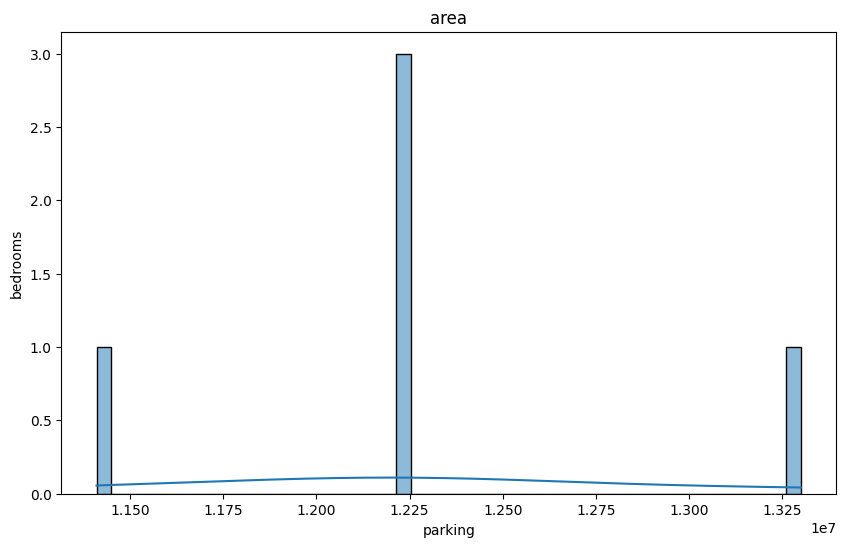

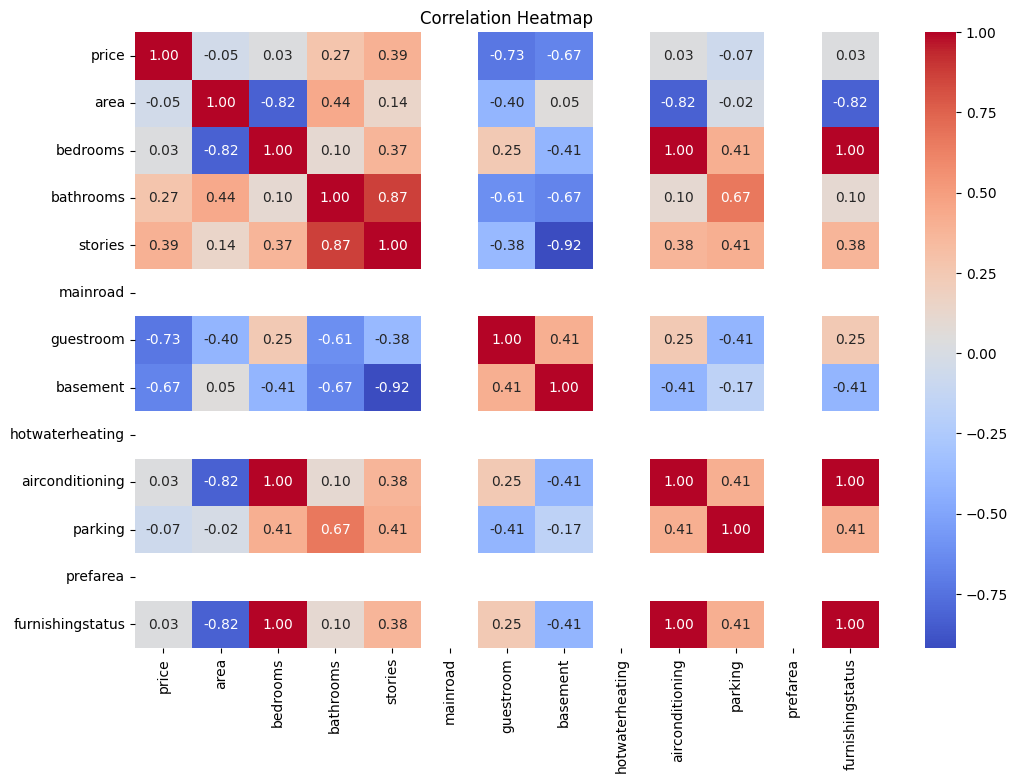

In [14]:
# Visualize the distribution of the target variable (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('area')
plt.xlabel('parking')
plt.ylabel('bedrooms')
plt.show()

# Visualize correlations with the target variable
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [18]:
# Fill missing values for numeric columns with the median
df.fillna(df.median(), inplace=True)

# Fill missing values for categorical columns with the mode
df.fillna(df.mode().iloc[0], inplace=True)

# Display the cleaned data
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             5 non-null      int64  
 1   area              5 non-null      int64  
 2   bedrooms          5 non-null      int64  
 3   bathrooms         5 non-null      int64  
 4   stories           5 non-null      int64  
 5   mainroad          5 non-null      int64  
 6   guestroom         5 non-null      int64  
 7   basement          5 non-null      int64  
 8   hotwaterheating   5 non-null      int64  
 9   airconditioning   5 non-null      int64  
 10  parking           5 non-null      int64  
 11  prefarea          5 non-null      int64  
 12  furnishingstatus  5 non-null      float64
dtypes: float64(1), int64(12)
memory usage: 652.0 bytes
None


In [19]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,1,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,1,1.0


In [21]:
# For demonstration, we will select a few features
features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']
df = df[features]

# Separate features and target variable
X = df.drop('price', axis=1)
y = df['price']


In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# 4. Define the model and hyperparameters for GridSearchCV
rf = RandomForestRegressor(random_state=42)

# Example hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2', None],  # 'auto' is not supported, so use 'sqrt', 'log2', or None
    'min_samples_split': [2, 5]
}

# 5. Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# 6. Perform the Grid Search and fit the model
grid_search.fit(X_train, y_train)

# 7. Get the best model after fitting
best_rf_model = grid_search.best_estimator_

# 8. Use the best fitted model to predict on the test set
y_pred_best_rf = best_rf_model.predict(X_test)

# 9. Evaluate the performance of the best model
print("\nBest Random Forest Model Evaluation")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best_rf)))


Fitting 3 folds for each of 36 candidates, totalling 108 fits


/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/Cellar/jupyterlab/4.2.


Best Random Forest Model Evaluation
RMSE: 473900.0


/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/Cellar/jupyterlab/4.2.

In [30]:
from joblib import dump

# Save the best model to a file
dump(best_rf_model, 'best_random_forest_model.joblib')


['best_random_forest_model.joblib']

[CV] END .max_depth=None, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, n_estimators=200; total time=   0.1s
[CV] END ...max_depth=30, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=30, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END ...max_depth=30, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ...max_depth=10, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=20, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=20, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=20, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END ...max_depth=20, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=30, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=30, ma

In [33]:
import streamlit as st
import numpy as np
from joblib import load

# Load the saved model with the correct file path
model = load('/Users/purplerain/Desktop/Data Science Projects For CV/End-to-End Machine Learning Project/best_random_forest_model.joblib')


# Define the UI layout
st.title('House Price Prediction App')

# Input fields for user to enter house details
st.header('Enter the house features:')

# Features input by user
area = st.number_input('Area (in square feet)', min_value=500, max_value=10000, value=2000)
bedrooms = st.number_input('Number of Bedrooms', min_value=1, max_value=10, value=3)
bathrooms = st.number_input('Number of Bathrooms', min_value=1, max_value=10, value=2)
stories = st.number_input('Number of Stories', min_value=1, max_value=5, value=2)
parking = st.number_input('Number of Parking spaces', min_value=0, max_value=5, value=1)

# Binary inputs (Yes/No)
mainroad = st.selectbox('Main Road', ('Yes', 'No'))
guestroom = st.selectbox('Guest Room', ('Yes', 'No'))
basement = st.selectbox('Basement', ('Yes', 'No'))
hotwaterheating = st.selectbox('Hot Water Heating', ('Yes', 'No'))
airconditioning = st.selectbox('Air Conditioning', ('Yes', 'No'))
prefarea = st.selectbox('Preferred Area', ('Yes', 'No'))

# Furnishing Status
furnishing_status = st.selectbox('Furnishing Status', ('Furnished', 'Semi-Furnished', 'Unfurnished'))

# Map binary choices to 0 and 1
mainroad = 1 if mainroad == 'Yes' else 0
guestroom = 1 if guestroom == 'Yes' else 0
basement = 1 if basement == 'Yes' else 0
hotwaterheating = 1 if hotwaterheating == 'Yes' else 0
airconditioning = 1 if airconditioning == 'Yes' else 0
prefarea = 1 if prefarea == 'Yes' else 0

# Map furnishing status to numeric values
furnishing_status_map = {'Furnished': 2, 'Semi-Furnished': 1, 'Unfurnished': 0}
furnishing_status = furnishing_status_map[furnishing_status]

# Create the input array for prediction
input_features = np.array([[area, bedrooms, bathrooms, stories, parking,
                            mainroad, guestroom, basement, hotwaterheating,
                            airconditioning, prefarea, furnishing_status]])

# Predict button
if st.button('Predict House Price'):
    # Make the prediction using the trained model
    predicted_price = model.predict(input_features)[0]

    # Display the prediction
    st.success(f'Predicted House Price: ${predicted_price:.2f}')



2024-09-27 20:43:07.730 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-27 20:43:07.731 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-27 20:43:07.731 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-27 20:43:07.732 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-27 20:43:07.732 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-27 20:43:07.732 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-27 20:43:07.733 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-27 20:43:07.733 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar